###### NAME : Hector Guzman
###### NET ID : ole10
###### SUBMISSION DATE : 2/12/25

### Instructions for submission

# HOW TO DO THE ASSIGNMENT?

```
>> Download this jupyter notebook file to your local computer.
>> Rename it by adding your netid. 'CS4347-Assighnment2-NetId.ipynb
>> Now start working on assignment
```

# HOW TO SUBMIT THE ASSIGNMENT?

```
>> Before you submit make sure you have the final version of your work.
>> Submit the jupyter notebook ('CS4347-Assighnment2-NetId.ipynb) with all cells' running results to Canvas.
>> Save the jupyter notebook with all cells' running results as a pdf, submit the pdf file to Canvas as well.   


# ASSIGNMENT 2 - INTRO TO MACHINE LEARNING


> **FULL MARKS = 100**



In this assignment we will use things we have learned from previous exercises. 

You will be asked to write your own version of code so as to achieve given 

task. You will be doing data wrangling, visualization, numerical computation 

and other stuff in this assignment. You will also come across newer library 

with plenty of example on how to use it. This assignment will guide you through the following three topics with examples and exercises.

1. **Simple example of classification using KNN algorithm**
    
    References
    > https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

    > https://github.com/a-martyn/ISL-python/blob/master/Notebooks/ch4_classification_applied.ipynb

    > https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

    > https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

    > https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

2. **Simple regression task.**
    > https://scikit-learn.org/stable/modules/linear_model.html

    > https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

    > https://python4mpia.github.io/fitting_data/least-squares-fitting.html

3. **Write your own version of regression with least square methods from scratch.**

[YOU WILL BE USING LIBRARY FOR TASK 1 and 2]



### 1. CLASSIFICATION USING KNN ALGORITHM

In [1]:
# Download the data set from link given below , use wget
# http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat
# Code goes here
#!wget http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat

# Download meta data from the link given below
# http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc

# Code goes here
#!wget http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc

# NOTE: If wget does not work on your MacOS computer, try the following code to download the dataset:
!curl -O http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat
!curl -O http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 16461    0 16461    0     0  71850      0 --:--:-- --:--:-- --:--:-- 72197
100 16461    0 16461    0     0  71830      0 --:--:-- --:--:-- --:--:-- 72197
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1170    0  1170    0     0   8537      0 --:--:-- --:--:-- --:--:--  8666


In [93]:
# View the meta-data of the dataset
# Use cat command to open heart.doc
!cat heart.doc

'cat' is not recognized as an internal or external command,
operable program or batch file.


***EXERCISE 1: [5 POINTS]***



In [95]:
# use pandas to read heart.dat
# Code goes here
# NOTE : use separator as space while reading this data
# Use column names from metadata in given order
# NOTE : YOU WON'T SEE 'PRESENCE' in metadata (in attribute information)
columns = ["age", "sex","chestpain","bp","cholestorel","sugar","ecg","heartrate","angina","oldpeak","slope","vessels","thal","presence"]

# Your code goes here
import pandas as pd
df = pd.read_csv('heart.dat', sep=' ', header=None, names=columns)
df.head()

,age,sex,chestpain,bp,cholestorel,sugar,ecg,heartrate,angina,oldpeak,slope,vessels,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


***EXERCISE 2: [5 POINTS]***



In [96]:
# Have a look at head and tail of your data
# You can use .tail and .head methods
# Print both of them, if you just run without printing only output from last command will be printed
# Let us view the size of dataset as well

# Code goes below

#print data head
print('Head:\n{}\n'.format(df.head()))

#print data tail
print('Tail:\n{}\n'.format(df.tail()))

#print data shape
print('Shape:\n{}\n'.format(df.shape))

Head:
    age  sex  chestpain     bp  cholestorel  sugar  ecg  heartrate  angina  \
0  70.0  1.0        4.0  130.0        322.0    0.0  2.0      109.0     0.0   
1  67.0  0.0        3.0  115.0        564.0    0.0  2.0      160.0     0.0   
2  57.0  1.0        2.0  124.0        261.0    0.0  0.0      141.0     0.0   
3  64.0  1.0        4.0  128.0        263.0    0.0  0.0      105.0     1.0   
4  74.0  0.0        2.0  120.0        269.0    0.0  2.0      121.0     1.0   

   oldpeak  slope  vessels  thal  presence  
0      2.4    2.0      3.0   3.0         2  
1      1.6    2.0      0.0   7.0         1  
2      0.3    1.0      0.0   7.0         2  
3      0.2    2.0      1.0   7.0         1  
4      0.2    1.0      1.0   3.0         1  

Tail:
      age  sex  chestpain     bp  cholestorel  sugar  ecg  heartrate  angina  \
265  52.0  1.0        3.0  172.0        199.0    1.0  0.0      162.0     0.0   
266  44.0  1.0        2.0  120.0        263.0    0.0  0.0      173.0     0.0   
267  56.

In [97]:
# Now let us see if there is some missing value
# Code goes here
df.isna().sum().sum()

0

In [98]:
# If there is any na values drop it
# Code goes here
df.dropna()

,age,sex,chestpain,bp,cholestorel,sugar,ecg,heartrate,angina,oldpeak,slope,vessels,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


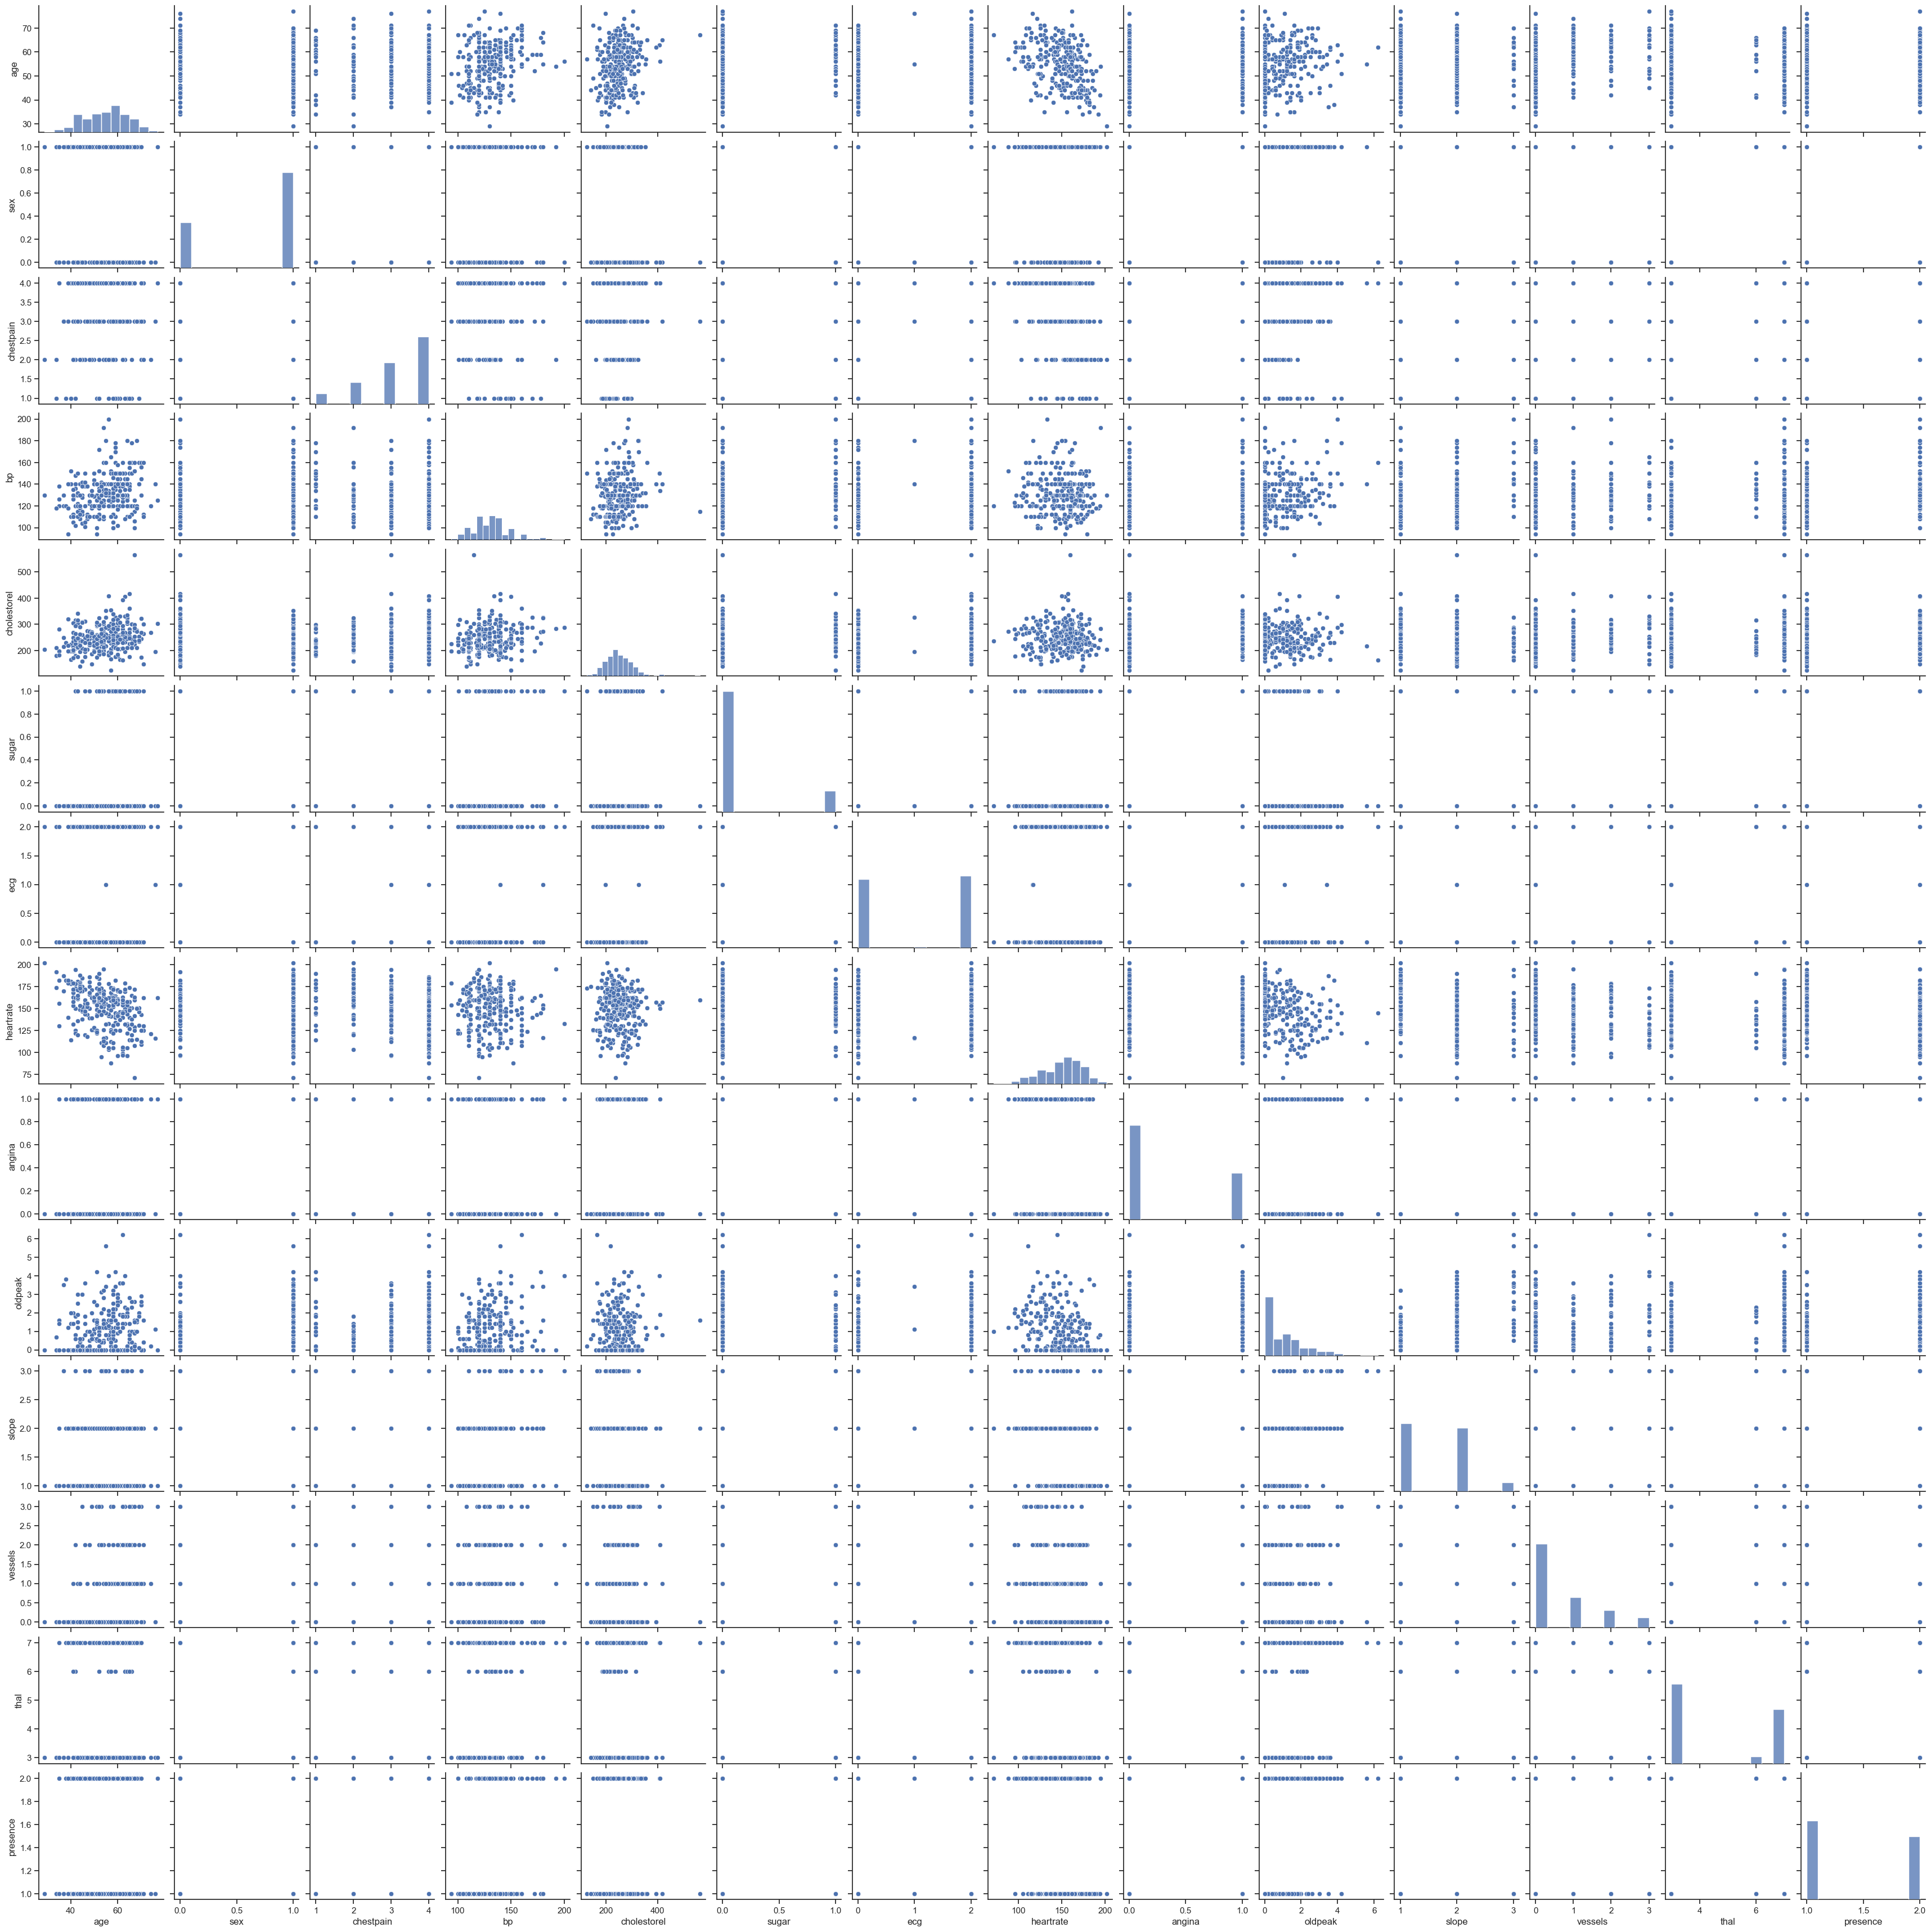

In [101]:
# Now let us use one amazing new data visualization library called as seaborn
# NOTE: You will need to install the seaborn package in your virtual environment , the command is "pip install seaborn"
import seaborn as sns

# Use pairplot from sns to plot this data frame
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

import matplotlib.pyplot as plt
plt.show()

***EXERCISE 3: [5 POINTS]***



In [102]:
# see the statistics of the data by describing dataframe
# Your code goes here
df.describe()

,age,sex,chestpain,bp,cholestorel,sugar,ecg,heartrate,angina,oldpeak,slope,vessels,thal,presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [ ]:
# If you go through metadata (Attribute Information:)
# You will find following information

# Attributes types
# -----------------

# Real: 1,4,5,8,10,12
# Ordered:11,
# Binary: 2,6,9
# Nominal:7,3,13

# This means all data in our dataframe are not of same types
# So we should deal them accordingly
# We don't have to do anything to 'real' data
# However we have to deal with binary data and nominal data
# This dataset has already incoded binary data as presence(1) or absence(0) information, so we don't have to do anything

# We only need to convert all nominal and ordered data to dummy variables 
# The folllwing is an example presents you a way to convert these variable into real variable using dummy variable
# Then You have to convert rest of the data by your self

In [103]:
# Lets see binary and nominal dat
# binary data = [sex, sugar, angina]
# nominal data = [chestpain, ecg, thal]
# ordered data = [slope]
# Lets view the data
df.head()

,age,sex,chestpain,bp,cholestorel,sugar,ecg,heartrate,angina,oldpeak,slope,vessels,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [104]:
# Lets see the unique chestpain cases
# Code goes here
df.chestpain.unique()

array([4., 3., 2., 1.])

In [105]:
# Lets get dummy variable for chestpain
# This is basically one hot encoding which means each row has only '1' value(True) and rest are '0'(False)
# Following lines of code will remove 'chestpain' column from the dataframe and replace with dummy values
# You can see these dummy values being appended columnwise
df = pd.get_dummies(df, columns=['chestpain'], prefix='chestpain', prefix_sep='-', dtype=int)
df.head()

,age,sex,bp,cholestorel,sugar,ecg,heartrate,angina,oldpeak,slope,vessels,thal,presence,chestpain-1.0,chestpain-2.0,chestpain-3.0,chestpain-4.0
0,70.0,1.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2,0,0,0,1
1,67.0,0.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1,0,0,1,0
2,57.0,1.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2,0,1,0,0
3,64.0,1.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1,0,0,0,1
4,74.0,0.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1,0,1,0,0


***EXERCISE 4: [5 POINTS]***



In [106]:
# Let's convert all nominal and ordered data to dummy variables like the above example
# Hint: you can do all in one line by passing multiple value in columns and prefix

# Code goes below
df = pd.get_dummies(df, columns=['ecg', 'thal', 'slope'], prefix=['ecg', 'thal', 'slope'], prefix_sep='-', dtype=int)
df.head()

,age,sex,bp,cholestorel,sugar,heartrate,angina,oldpeak,vessels,presence,...,chestpain-4.0,ecg-0.0,ecg-1.0,ecg-2.0,thal-3.0,thal-6.0,thal-7.0,slope-1.0,slope-2.0,slope-3.0
0,70.0,1.0,130.0,322.0,0.0,109.0,0.0,2.4,3.0,2,...,1,0,0,1,1,0,0,0,1,0
1,67.0,0.0,115.0,564.0,0.0,160.0,0.0,1.6,0.0,1,...,0,0,0,1,0,0,1,0,1,0
2,57.0,1.0,124.0,261.0,0.0,141.0,0.0,0.3,0.0,2,...,0,1,0,0,0,0,1,1,0,0
3,64.0,1.0,128.0,263.0,0.0,105.0,1.0,0.2,1.0,1,...,1,1,0,0,0,0,1,0,1,0
4,74.0,0.0,120.0,269.0,0.0,121.0,1.0,0.2,1.0,1,...,0,0,0,1,1,0,0,1,0,0


In [107]:
# Sklearn

from sklearn.neighbors import KNeighborsClassifier
import numpy as np


# Get training data from dataframe
# Assign values of ['presence'] column to y, note you have to use .values method
# Drop 'presence' column from data frame,
# assign df values to X

# Your code goes below
y = df.presence.values
df.drop(columns=['presence'], inplace=True)
X = df.values

In [108]:
# View shape of x and y
X.shape, y.shape

((270, 22), (270,))

In [109]:
# Split dataset into train and test data use train_test_split
# Use stratify = y and test_size = 20 and random_state = 1

from sklearn.model_selection import train_test_split

# Your code goes below

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1, stratify=y)

In [110]:
# Initialize n_neighbors = 3
# Fit knn model with X_train and y_train data
# Your code goes here
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [112]:
# Predict X_test and view first 25 prediciton
# Compare prediction with real y_test
# Your code goes here
print(knn.predict(X_test)[0:25])
print(y_test[0:25])

[2 2 1 1 1 2 1 1 2 2 2 1 1 1 2 1 1 2 1 1 2 1 1 1 1]
[2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1 2 2 1 1 1]


In [113]:
# Now get the score on the test set using knn score method 
print(knn.score(X_test, y_test))


0.7222222222222222


In [114]:
# Note the way we fit the dataset is not good 
# Next we need to do some normalization work to rescale the dataset 
# First we will rescale only real value columns
realcols = ['age','bp','cholestorel','heartrate','oldpeak','vessels']

# For each column normalize df[col] as (x - mean) / standard_deviation

for col in realcols:
  mean = df[col].mean()
  std = df[col].std()
  df[col] = (df[col] - mean)/std

In [115]:
# Now run your experiment again and print score

# update x
X = df.values

# Train test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1, stratify=y)

# Model Initialization
knn = KNeighborsClassifier(n_neighbors=3)

# Model fitting with training data
knn.fit(X_train, y_train)

# Now print score on test data
knn.score(X_test, y_test)

0.8703703703703703

***EXERCISE 5: [10 POINTS]***



In [117]:
# Compare scores with and without data normalization and explain why the scores are different

# Your answer goes here
"""
write your answer below
The normalized data set has the values compressed down to be from 0 to 1 with maximum values never going past 1.
Therefore, the normalized score is higher due to compression.
"""
print()

[0.7777777777777778, 0.7592592592592593, 0.8703703703703703, 0.8888888888888888, 0.9444444444444444, 0.9259259259259259, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9074074074074074, 0.9259259259259259, 0.9074074074074074, 0.9259259259259259, 0.9074074074074074, 0.9259259259259259]
BESt VALUE OF K 5


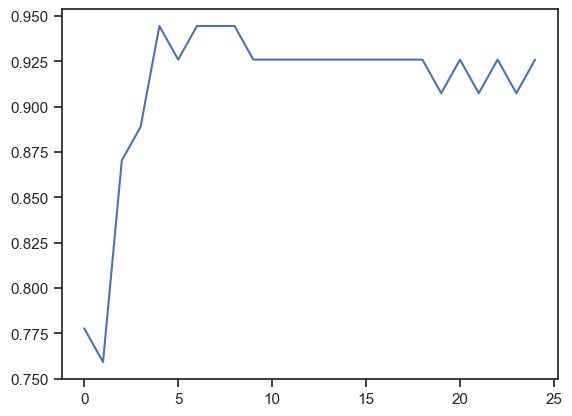

In [118]:
# Now we will write a function that will initialize, fit and return score on test data for given values of k
# Plot your result
import matplotlib.pyplot as plt

def returnScore(k, X_train, X_test, y_train, y_test):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  return knn.score(X_test, y_test)

# Use values from 1 to 25(inclusive) and get score and plot as a bar graph
# Hint : For advance method you can use map (recall functional programming from last exercise)
# or you can use simple loops

# Your code goes here
# Get everything in a list named 'result'
# print result

result = [*map(lambda i:returnScore(i,X_train, X_test, y_train, y_test), range(1,26))]
print(result)
plt.plot(result)

# Finally you can print the best value of k by getting the index 
# Note index starts with 0 but values of k starts with 1 so actual value of k will be 1 more
# You can use np.argmax() function

# your code goes here
print('BESt VALUE OF K',np.argmax(result) + 1 )

***EXERCISE 6: [5 POINTS]***



In [128]:
# Now define your best model as bestknn and print score
# fill the blank code below  
bestknn = KNeighborsClassifier(n_neighbors=4)
bestknn.fit(X_train, y_train)
bestknn.score(X_test, y_test)

0.8888888888888888

In [129]:
# Finally use bestknn model we defined and create confusion matrix
# print matrix
from sklearn.metrics import confusion_matrix

y_pred = bestknn.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[29  1]
 [ 5 19]]


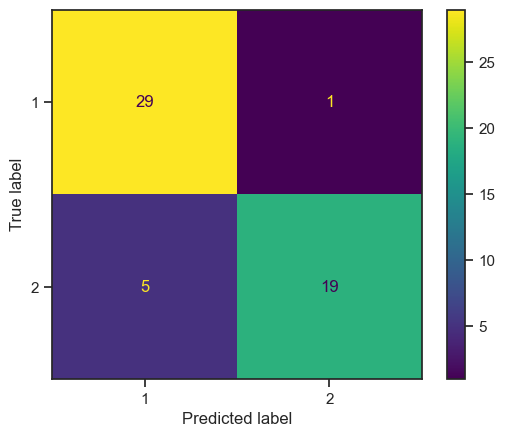

In [130]:
# Please review following examples in documentation plot confusion plots
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### 2. REGRESSION TASK USING SKLEARN

In [133]:
# Lets see what we have in our directory
%ls

 Volume in drive C has no label.
 Volume Serial Number is A437-C037

 Directory of C:\Users\alexg\Desktop

02/12/2025  05:16 PM    <DIR>          .
02/12/2025  03:28 PM    <DIR>          ..
02/12/2025  02:39 PM    <DIR>          .ipynb_checkpoints
02/02/2025  01:20 PM    <DIR>          C++
01/25/2025  06:19 PM    <DIR>          CS3339-master
02/12/2025  05:14 PM           973,839 CS4347-Assignment2-ole10.ipynb
02/12/2025  01:57 PM    <DIR>          CS4347Spring25-main
02/12/2025  03:03 PM            16,461 heart.dat
02/12/2025  03:03 PM             1,170 heart.doc
02/07/2025  03:33 PM    <DIR>          knapsack
               3 File(s)        991,470 bytes
               7 Dir(s)  346,489,016,320 bytes free


***EXERCISE 7: [5 POINTS]***


In [138]:
# Lets get data from 
# https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

# Your code goes here
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 20405    0 20405    0     0  79090      0 --:--:-- --:--:-- --:--:-- 80019
100 30286    0 30286    0     0   111k      0 --:--:-- --:--:-- --:--:--  112k


In [139]:
# Lets get meta data from 
# https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

# Your code goes here
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1660    0  1660    0     0   8538      0 --:--:-- --:--:-- --:--:--  8601


In [140]:
# Lets see our folder again
%ls

 Volume in drive C has no label.
 Volume Serial Number is A437-C037

 Directory of C:\Users\alexg\Desktop

02/12/2025  05:18 PM    <DIR>          .
02/12/2025  03:28 PM    <DIR>          ..
02/12/2025  02:39 PM    <DIR>          .ipynb_checkpoints
02/12/2025  05:18 PM            30,286 auto-mpg.data
02/12/2025  05:18 PM             1,660 auto-mpg.names
02/02/2025  01:20 PM    <DIR>          C++
01/25/2025  06:19 PM    <DIR>          CS3339-master
02/12/2025  05:16 PM           974,835 CS4347-Assignment2-ole10.ipynb
02/12/2025  01:57 PM    <DIR>          CS4347Spring25-main
02/12/2025  03:03 PM            16,461 heart.dat
02/12/2025  03:03 PM             1,170 heart.doc
02/07/2025  03:33 PM    <DIR>          knapsack
               5 File(s)      1,024,412 bytes
               7 Dir(s)  346,486,779,904 bytes free


In [149]:
# Lets take a look at metadata, auto-mpg.names

# Your code goes here
%cat auto-mpg.names

UsageError: Line magic function `%cat` not found.


In [205]:
# Read data using panda
column_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin','name']
df = pd.read_csv('auto-mpg.data', names=column_names, na_values = "?", comment='\t',sep=" ", skipinitialspace=True)

In [206]:
# View head of the data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


***EXERCISE 8: [5 POINTS]***



In [207]:
# Remove column 'name'
# Print head

# Your code goes here
df.drop(columns=['name'], inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


***EXERCISE 9: [5 POINTS]***



In [208]:
# Check if there is na

# Your code goes here
df.isna().sum().sum()

6

***EXERCISE 10: [5 POINTS]***



In [212]:
# Drop na and show head

# Your code goes here
df = df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


***EXERCISE 11: [5 POINTS]***





In [213]:
# Convert following columns to dummy variable
cols = ['cylinders','year','origin']

# Your code goes here
df = pd.get_dummies(df, columns=cols, prefix=cols, prefix_sep='-', dtype=int)

df.head()

,mpg,displacement,horsepower,weight,acceleration,cylinders-3,cylinders-4,cylinders-5,cylinders-6,cylinders-8,...,year-76,year-77,year-78,year-79,year-80,year-81,year-82,origin-1,origin-2,origin-3
0,18.0,307.0,130.0,3504.0,12.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,15.0,350.0,165.0,3693.0,11.5,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,18.0,318.0,150.0,3436.0,11.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,16.0,304.0,150.0,3433.0,12.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,17.0,302.0,140.0,3449.0,10.5,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


***EXERCISE 12: [10 POINTS]***



In [214]:
# Now do data normalization on real value/continous columns
realcols = ["mpg","displacement","horsepower","weight","acceleration"]

# Your code goes here
for col in realcols:
  mean = df[col].mean()
  std = df[col].std()
  df[col] = (df[col] - mean)/std

In [215]:
# Now we are going to do some regression task.
# In this section we will try to predict real value 
# Given all the information we will try to predict mpg - miles per gallon 

***EXERCISE 13: [10 POINTS]***



In [216]:
# Assign the column mpg values to y (targets), and the rest columns to X (features), remember X shouldn't have mpg
# Your code goes here
y = df.mpg.values
df.drop(columns=['mpg'], inplace=True)
X = df.values

In [217]:
# Do Train test in a similar way as we did before do not use stratify=y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [218]:
# View the shape of your data set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 25), (79, 25), (313,), (79,))

In [219]:
# Follow examples from references given in the top of this notebook
# Use linear model to fit regression line and plot
# Our linear model will be of following type
# Y = b + coef0*x0 + coef1*x1+coef2*x2+............
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [220]:
# Now view the coefficient use .coef_ and shape of .coef_ [not it is not a function, but a variable]
print(reg.coef_)
print(reg.intercept_)
print(reg.coef_.shape[0])

[ 0.1192505  -0.15224619 -0.61496586  0.02092634 -0.6358025   0.21115814
  0.2048133  -0.08713151  0.30696257 -0.38465186 -0.23786181 -0.47386072
 -0.44623061 -0.17606361 -0.2546858  -0.18816691 -0.02347771  0.02785325
  0.23596676  0.81711485  0.48029694  0.62376723 -0.17226673  0.06651513
  0.1057516 ]
-0.09296052185299293
25


In [222]:
# Explain the meaning of the reg.coef_, reg.intercept, and reg.coef_.shape[0] as of the linear regression model
"""
write your answer below
reg.coef_: are the cost w of each feature in the linear regression equation cost function
reg.intercept_: is b, y intercept of the linear regression cost function
reg.coef_.shape[0]: is the number of features we have in the cost function
"""
print()

***EXERCISE 14: [10 POINTS]***



In [224]:
# Now if you view 
print(f'{reg.coef_.shape[0]},{X_train.shape[1]}, ', f'are equal? {reg.coef_.shape[0]==X_train.shape[1]}')

# Why they are same?
# Answer goes here
"""
write your answer below
because it is simply a convention of each method, both are returning the number of features.
The number of features should remain the same to get an accurate model.

"""
print()

25,25,  are equal? True



In [225]:
# Now lets see what score is here
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.score?

Signature: reg.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination of the prediction.

The coefficient of determination :math:`R^2` is defined as
:math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always predicts
the expected value of `y`, disregarding the input features, would get
a :math:`R^2` score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a precomputed
    kernel matrix or a list of generic objects instead with shape
    ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
    is the number of samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_outp

In [228]:
# Calculate the score on train and test sets

# Your code goes below
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.8574958414032212

***EXERCISE 15: [10 POINTS]***



In [230]:
# Explain what's the meaning of reg.score return value. 
# Note: you can use function helper 'reg.score?' to help you get the answer 
"""
Your answer goes here: 
the score value returned is how close our model was to predicting accurate values
the closer to 1 the "better" our model is

"""
print()

In [231]:
# Now Write a custom function to calculate r2 score

def r2score(ytrue, ypred):
  rss = ((ytrue - ypred)**2).sum()
  tss = ((ytrue - ytrue.mean()) ** 2).sum()
  r2 = 1 - rss/tss
  return r2

# Now do prediction on X_train and X_test and check your r2 score by printing rescore values 
trainpredict = reg.predict(X_train)
testpredict = reg.predict(X_test)

print(r2score(y_train, trainpredict), r2score(y_test, testpredict))

# Note reg.score values and your custom function output should match

0.8772133020796734 0.8574958414032212


In [232]:
# Now we will try to reveal the secret of linear regression.
# One way of achieving linear regression is by minimizing the error between actual y and predicted y.
# It is called as least square method.
# For detail information you can visit to the link provided at the bieginning of this document.
# This section is a little bit difficult, please read examples and documentation carefully. 
# We will make our custom least square optimize to calculate model parameters that minimizes output error. 

In [233]:
import scipy.optimize as optimization

# Write a function which takes weights(or params), X and y and do following
#      - calculate dot product between X and params , which is ypredicted
#      - calculate difference between actual y and ypredicted
#      - return the difference

# complete following function
def constraint(params, X, y):
  ypred = X@params
  return y-ypred

# We need initial guess for our params
# Our initial params is a vector of size equal to dimension of X, or you can say number of columns of X
# You can create zeros vector using np.zeros(size)

# complete code
params = np.zeros(X.shape[1])


# Now study the documentation and complete following code
params, _ = optimization.leastsq(constraint, params, args=(X_train, y_train))

# Now we have parameter or weight we can now create our model
model = lambda X:np.dot(X,params)

# Now predict X_train using model and see first 5 predicted and actual values
ypred_train = model(X_train)
print(ypred_train[:5])
print(y_train[:5])

# Similarly calculate prediction on test set and view frist 5 predicted values
ypred_test = model(X_test)
print(ypred_test[:5])
print(y_test[:5])

# Now use custom made r2score calculator to calculate r2 score on both train and test set
print(r2score(y_train, ypred_train), r2score(y_test, ypred_test))

[ 0.79370023 -0.75267238  0.54018392  1.77416136  1.24366989]
[ 0.48098373 -0.62087299  0.71160491  1.76221248  1.22409641]
[ 0.02836142  0.56226081  1.18625139 -0.29593787  1.59445988]
[-0.05713234  0.71160491  1.14722268 -0.56962384  1.86471078]
0.8772133020796734 0.8574958413643603


In [236]:
# Compare these results with the results you got from library based implementation
# What did you find
"""
Your answer goes here: 
The difference is miniscule with the library implementation having a a higher score if comparing numbers at each decimal place
The point of the least squares method is to calculate the error vector in the projection. This is linear algebra projections.
(Error vector) = (b vector) - (projection b vector)
"""
print()